In [12]:
import cv2
import numpy as np
import h5py

def info(img8):
    print img8.dtype
    print img8.shape
    print type(img8)
    print np.max(img8)
    print np.min(img8)

In [39]:
datafile = '/home/xli/jp2_Temp/M919-F168--_2_0503.mat'
img1 = h5py.File(datafile)
img1 = np.asarray(img1['img'])

In [13]:
t1 = img1[:,9287:11209,1983:3985]
t2 = img1[:,1983:3985,9287:11209]
t3 = img1.T[9287:11209,1983:3985,:]
t4 = img1.T[1983:3985,9287:11209,:]

print info(t1)
print info(t2)
print info(t3)
print info(t4)

uint8
(22784, 1922, 0)
<type 'numpy.ndarray'>


ValueError: zero-size array to reduction operation maximum which has no identity

In [14]:
import scipy.io as sio

In [15]:
mat=sio.loadmat('/home/xli/Documents/3.3-Cell/sample images/traindata.mat')

In [16]:
mat

{'None': MatlabOpaque([ ('svmmodel', 'MCOS', 'ClassificationSVM', [[3707764736L], [2L], [1L], [1L], [1L], [4L]])], 
       dtype=[('s0', 'O'), ('s1', 'O'), ('s2', 'O'), ('arr', 'O')]),
 '__function_workspace__': array([[ 0,  1, 73, ...,  0,  0,  0]], dtype=uint8),
 '__globals__': [],
 '__header__': 'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Tue Apr  4 22:25:21 2017',
 '__version__': '1.0',
 'groupvector': array([[0],
        [0],
        [0],
        ..., 
        [0],
        [0],
        [0]], dtype=uint8),
 'groupvectors': array([[ array([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [

In [17]:
mat['trainimg'].shape

(1, 5)

In [18]:
traindata1 = mat['trainimg'][0,0]

In [19]:
trainy1 = mat['groupvectors'][0,0]

In [20]:
traindata1 = traindata1.reshape([traindata1.shape[0]*traindata1.shape[1], 3])

In [21]:
testdata1 = mat['trainimg'][0,1]

In [22]:
testy1 = mat['groupvectors'][1,0]

In [23]:
testdata1 = testdata1.reshape([testdata1.shape[0] * testdata1.shape[1],3])

In [24]:
testy1.shape

(1681, 1)

In [25]:
testdata1.shape

(1681, 3)

In [70]:
from sklearn import svm

In [71]:
clf = svm.SVC()

In [92]:
trainy1 = np.ravel(trainy1)

In [93]:
clf.fit(traindata1, trainy1)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [100]:
yy=clf.predict(traindata1)

In [101]:
yy.shape

(441,)

In [103]:
count = 0
for i in range(yy.shape[0]):
    if yy[i] != trainy1[i]:
        count = count +1

In [104]:
count

14

In [79]:
count/float(yy.shape[0])

0.1885782272456871

In [84]:
countT=0
count = 0
for i in range(testy1.shape[0]):
    if testy1[i,0] == 1:
        countT = countT +1
        if yy[i] != testy1[i,0]:
            count = count +1

In [85]:
countT

316

In [86]:
count

314

In [88]:
np.sum(yy)

5

In [26]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['info', 'mat']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


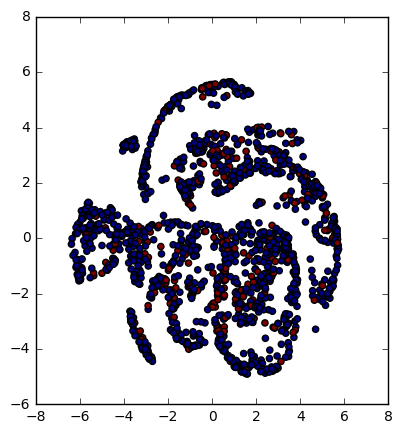

In [32]:
from sklearn.manifold import TSNE

X_tsne = TSNE(learning_rate=100).fit_transform(testdata1)

figure(figsize=(10, 5))
subplot(121)
scatter(X_tsne[:, 0], X_tsne[:, 1], c=testy1)

In [8]:
img=cv2.imread('/home/xli/jp2_Temp/M919-F168--_2_0503_lossless.jp2',-1)

In [9]:
img.shape

(22784, 22528, 3)

In [10]:
info(img)

uint16
(22784, 22528, 3)
<type 'numpy.ndarray'>
3825
0


In [11]:
img1 = np.asarray(img,'uint8')
#t1 = img1[:,9287:11209,1983:3985]
#t2 = img1[:,1983:3985,9287:11209]
t3 = img1[9287:11209,1983:3985,:]
t4 = img1[1983:3985,9287:11209,:]

cv2.imwrite('/home/xli/jp2_Temp/xy.jp2', t3)
cv2.imwrite('/home/xli/jp2_Temp/yx.jp2', t4)

True